In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle


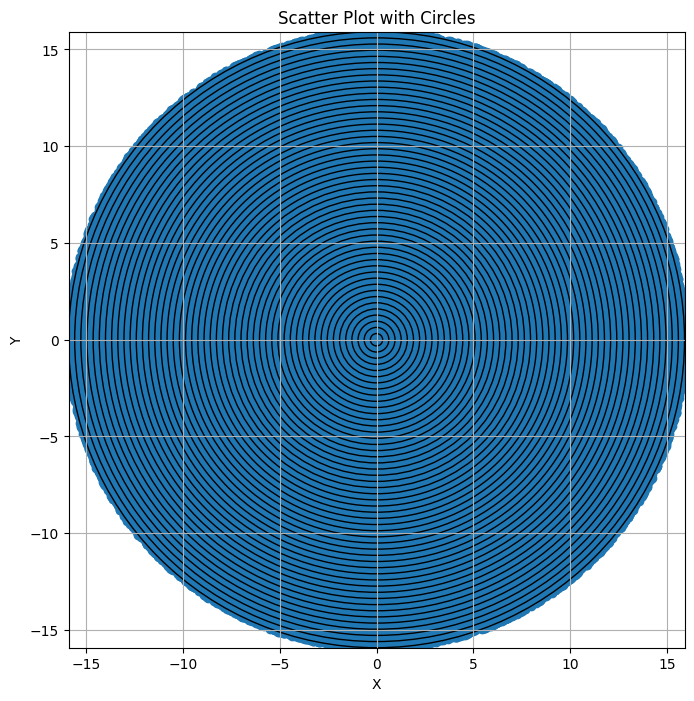

In [9]:
N = 300000
a = 100
bins = 50

# Генерация данных
radiuses = np.random.uniform(0, (a / (2 * np.pi)), size=N)
angles = np.random.uniform(0, 2 * np.pi, size=N)
x = radiuses * np.cos(angles)
y = radiuses * np.sin(angles)


plt.figure(figsize=(8, 8))

plt.scatter(x, y)

rmax = np.max(radiuses)

# Построение окружностей
for i in range(1, bins + 1):
    circle = Circle((0, 0), (i / bins) * rmax, fill=False)
    plt.gca().add_artist(circle)

# Настройка графика
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-rmax, rmax)
plt.ylim(-rmax, rmax)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Circles')
plt.grid(True)

plt.show()

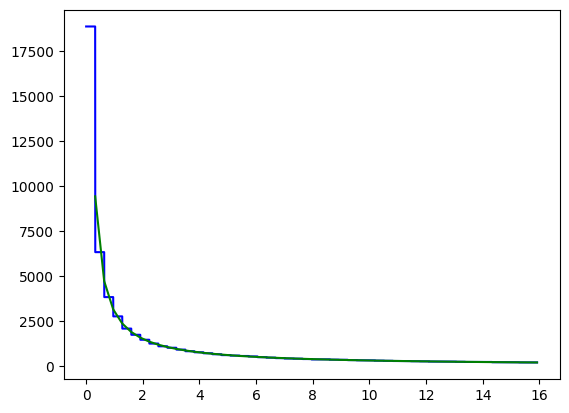

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def density(r, a): 
    return N / (a * r)

step = (rmax - min(radiuses)) / bins
parts = np.linspace(min(radiuses) + step, rmax, bins)

res = np.zeros(bins)
for i, part in enumerate(parts):
    within_range = np.logical_and(radiuses >= part - step, radiuses <= part)
    res[i] = np.sum(1 / (np.pi * part**2 - np.pi * (part - step)**2) * within_range)

def f(r):
    return res[np.argmax(parts > r)]

x = np.linspace(min(radiuses), parts[-1], N)

y = np.array([f(xi) for xi in x])

dens = density(parts, a)

plt.plot(x[:-2], y[:-2], c="blue")
plt.plot(parts, dens, c="g")
plt.show()
